# Introduction to PyTorch


Python-based scientific computing package for two main purposes:

* Replacement for **NumPy** to use the power of GPUs
* **Deep learning** research platform that provides maximum flexibility and speed


Sources:


*   https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e
*   https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html



### 0) NumPy reminder


In [3]:
import numpy as np

x = np.array([2, 3])
print(x)
y = np.array([4, 9])
print(y)

print(x + y)
print(x * y)

print(np.dot(x, y))

print(x**2)

A = np.array([[2, 3], [4, 5]])
print(A)

[2 3]
[4 9]
[ 6 12]
[ 8 27]
35
[4 9]
[[2 3]
 [4 5]]


In [4]:
x = np.random.normal(size=10)
print(x)

A = np.random.normal(size=(4, 4))
print(A)

print(A**2)

print(np.linalg.inv(A))

[ 1.34546067 -0.1406399  -1.66801524  0.98072097  0.83933041  0.84313753
  0.89312139 -1.8658715  -0.17564979  1.17843379]
[[ 0.94820077  0.29977022  1.53041344  0.29458179]
 [ 0.00613297 -0.09540204 -0.47677182  0.2166259 ]
 [ 0.01192064  0.75313925 -0.31163174  0.62640429]
 [ 0.16453774 -1.14878947  1.24425445 -0.17619843]]
[[8.99084695e-01 8.98621834e-02 2.34216529e+00 8.67784310e-02]
 [3.76133190e-05 9.10155010e-03 2.27311369e-01 4.69267801e-02]
 [1.42101587e-04 5.67218730e-01 9.71143437e-02 3.92382333e-01]
 [2.70726686e-02 1.31971724e+00 1.54816914e+00 3.10458853e-02]]
[[ 1.23479463  2.45924669 -1.71406108 -1.00574493]
 [ 0.10480362 -1.31850324  0.24561648 -0.57261291]
 [-0.09434208 -1.42508285  0.69098323  0.54673331]
 [-0.19644062  0.82949576  1.67748148  0.9796003 ]]


### 1) Basic operations

In [5]:
import torch

x = torch.tensor([3., 4.])
y = torch.tensor([5., 9.])

print(x + y)
print(x - y)
print(x ** 2)

A = torch.tensor([[2., 3.], [4., 5.]])
print(A)

print(torch.matmul(A, x))

tensor([ 8., 13.])
tensor([-2., -5.])
tensor([ 9., 16.])
tensor([[2., 3.],
        [4., 5.]])
tensor([18., 32.])


In [6]:
torch.cuda.is_available()

True

In [14]:
print(x)

x = x.to('cuda')
y = y.to('cuda')

print(x + y)

tensor([3., 4.], device='cuda:0')
tensor([ 8., 13.], device='cuda:0')


### 2) Bridge to NumPy

In [18]:
a = np.array([2, 3])
x = torch.from_numpy(a)
print(x)
print(x.numpy())

tensor([2, 3])
[2 3]


### 3) Automatic Differentiation

Mathematically, if you have a vector valued function $y=f(x)$, then the gradient of $y$  with respect to $x$  is a Jacobian matrix:

\begin{split}J=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\end{split}

Generally speaking, `torch.autograd` is an engine for computing vector-Jacobian product. That is, given any vector $v=\left(\begin{array}{cccc} v_{1} & v_{2} & \cdots & v_{m}\end{array}\right)^{T}$  compute the product   $v^{T}\cdot J$.


If $v$ happens to be happens to be the gradient of a scalar function $l = g(y)$, that is $v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$, then by the chain rule, the vector-Jacobian product would be the gradient of $l$ with respect to $x$:

\begin{split}J^{T}\cdot v=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\left(\begin{array}{c}
 \frac{\partial l}{\partial y_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial y_{m}}
 \end{array}\right)=\left(\begin{array}{c}
 \frac{\partial l}{\partial x_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial x_{n}}
 \end{array}\right)\end{split}


In [26]:
a = torch.tensor([2.0, 3.0], requires_grad=True)
b = torch.tensor([3.0, 4.0], requires_grad=True)

y = 3*a**3 - b**2
print(y)

tensor([15., 65.], grad_fn=<SubBackward0>)


In [28]:
y.backward(torch.tensor([1.,1.]))

In [29]:
print(a.grad == 9*a**2)
print(b.grad == -2*b)

tensor([True, True])
tensor([True, True])


### 4) Linear regression example

In [6]:
x = torch.normal(0, 5, size=(100,))
y = x * 10 + 4 + 5 * torch.normal(0, 1, size=(100,))

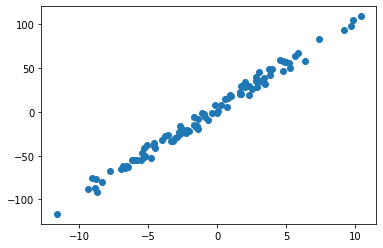

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x, y)

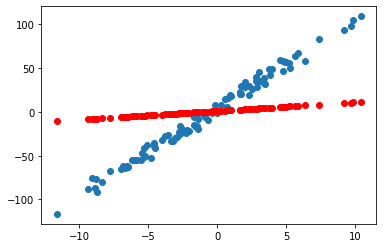

In [12]:
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

def plot_model(q, w):
  plt.scatter(x, y)
  plt.scatter(x, q.detach() * x + w.detach(), color='red')

plot_model(a, b)

In [13]:
import torch.optim as optim

lr = 0.001

sgd = optim.SGD([a, b], lr)

for i in range(100):
  error = torch.mean((x * a + b - y) ** 2)

  print(error.detach())

  error.backward()

  # with torch.no_grad():
  #   a -= lr * a.grad
  #   b -= lr * b.grad

  sgd.step()

  # a.grad.zero_()
  # b.grad.zero_()
  sgd.zero_grad()

tensor(1896.7812)
tensor(1726.8481)
tensor(1572.4452)
tensor(1432.1527)
tensor(1304.6805)
tensor(1188.8569)
tensor(1083.6169)
tensor(987.9930)
tensor(901.1061)
tensor(822.1575)
tensor(750.4213)
tensor(685.2385)
tensor(626.0096)
tensor(572.1906)
tensor(523.2869)
tensor(478.8491)
tensor(438.4689)
tensor(401.7755)
tensor(368.4318)
tensor(338.1315)
tensor(310.5965)
tensor(285.5741)
tensor(262.8345)
tensor(242.1690)
tensor(223.3880)
tensor(206.3194)
tensor(190.8064)
tensor(176.7070)
tensor(163.8920)
tensor(152.2439)
tensor(141.6561)
tensor(132.0316)
tensor(123.2825)
tensor(115.3287)
tensor(108.0974)
tensor(101.5228)
tensor(95.5447)
tensor(90.1086)
tensor(85.1651)
tensor(80.6691)
tensor(76.5797)
tensor(72.8597)
tensor(69.4754)
tensor(66.3962)
tensor(63.5941)
tensor(61.0438)
tensor(58.7224)
tensor(56.6088)
tensor(54.6842)
tensor(52.9313)
tensor(51.3344)
tensor(49.8793)
tensor(48.5529)
tensor(47.3436)
tensor(46.2407)
tensor(45.2345)
tensor(44.3160)
tensor(43.4774)
tensor(42.7114)
tensor(42.011

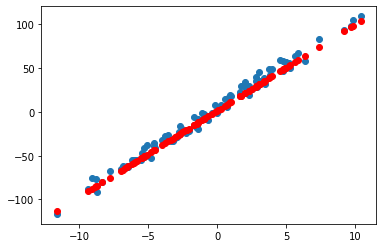

In [14]:
plot_model(a, b)

### 5) Non-linear regression example
